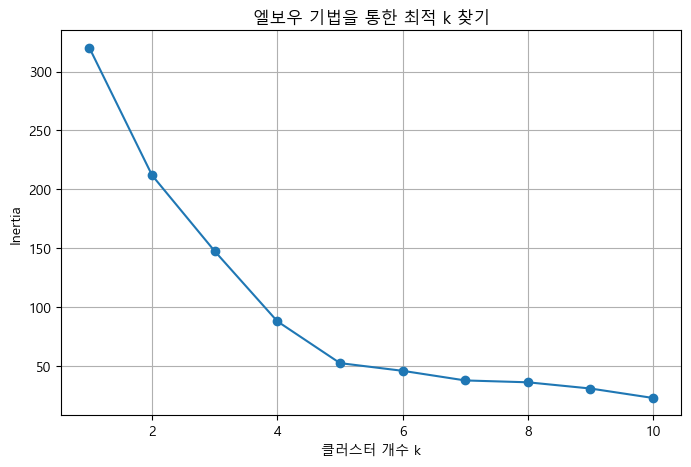

Train Silhouette Score: 0.553
Test Silhouette Score: 0.567


C:\Users\ez\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


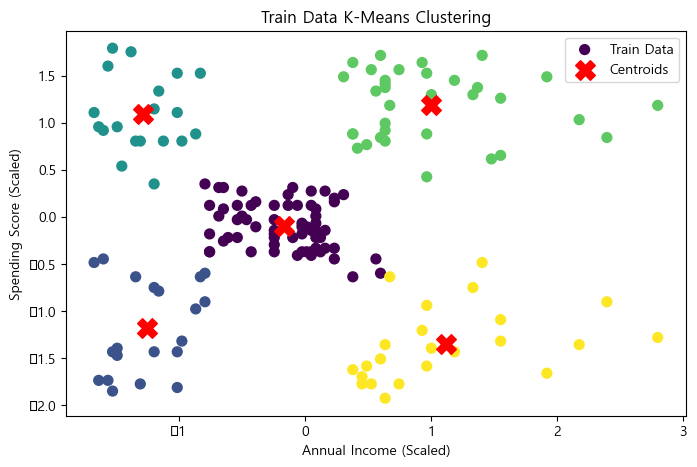

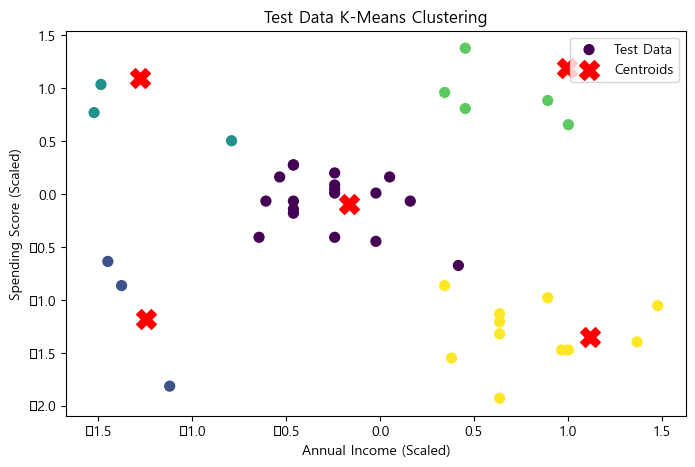


[클러스터별 원데이터 통계 (Train)]
        Annual Income (k$)          Spending Score (1-100)        
                      mean min  max                   mean min max
Cluster                                                           
0                56.156250  39   77              49.187500  35  61
1                26.550000  15   39              20.650000   3  40
2                25.684211  15   38              80.526316  61  99
3                87.823529  69  137              82.970588  63  97
4                91.217391  71  137              16.173913   1  39

Cluster 0:
 평균 소득: 56.16k$
 평균 소비 점수: 49.19
저소득 저소비 고객군

Cluster 1:
 평균 소득: 26.55k$
 평균 소비 점수: 20.65
저소득 저소비 고객군

Cluster 2:
 평균 소득: 25.68k$
 평균 소비 점수: 80.53
저소득 고소비 고객군

Cluster 3:
 평균 소득: 87.82k$
 평균 소비 점수: 82.97
고소득 고소비 고객군

Cluster 4:
 평균 소득: 91.22k$
 평균 소비 점수: 16.17
고소득 저소비 고객군


In [6]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

# 1. 데이터 로드
data = pd.read_csv('Mall_Customers.csv')

# 2. 사용할 변수 선택
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. 데이터 분리 (8:2)
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# 4. 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 엘보우 기법을 통한 최적 k 찾기
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('엘보우 기법을 통한 최적 k 찾기')
plt.xlabel('클러스터 개수 k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 엘보우 그래프 보고 최적 k 선택
optimal_k = 5

# 6. KMeans 학습
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

# 7. 클러스터 레이블 예측
train_labels = kmeans.predict(X_train_scaled)
test_labels = kmeans.predict(X_test_scaled)

# 8. Silhouette Score 계산
train_silhouette = silhouette_score(X_train_scaled, train_labels)
test_silhouette = silhouette_score(X_test_scaled, test_labels)
print(f"Train Silhouette Score: {train_silhouette:.3f}")
print(f"Test Silhouette Score: {test_silhouette:.3f}")

# 9. Train 데이터 시각화 (X 표시 중심점)
plt.figure(figsize=(8,5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_labels, cmap='viridis', s=50, label='Train Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title('Train Data K-Means Clustering')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

# 10. Test 데이터 시각화 (X 표시 중심점)
plt.figure(figsize=(8,5))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_labels, cmap='viridis', s=50, label='Test Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title('Test Data K-Means Clustering')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

# 11. 클러스터별 원데이터 해석 (Train 데이터 기준)
X_train_result = X_train.copy()
X_train_result['Cluster'] = train_labels

print("\n[클러스터별 원데이터 통계 (Train)]")
cluster_summary = X_train_result.groupby('Cluster').agg(['mean', 'min', 'max'])
print(cluster_summary)

# 12. 클러스터 특성 해석
for i in range(optimal_k):
    cluster_data = X_train_result[X_train_result['Cluster'] == i]
    mean_income = cluster_data['Annual Income (k$)'].mean()
    mean_score = cluster_data['Spending Score (1-100)'].mean()
    print(f"\nCluster {i}:")
    print(f" 평균 소득: {mean_income:.2f}k$")
    print(f" 평균 소비 점수: {mean_score:.2f}")
    if mean_income >= 70 and mean_score >= 60:
        print("고소득 고소비 고객군")
    elif mean_income >= 70 and mean_score < 40:
        print("고소득 저소비 고객군")
    elif mean_income < 40 and mean_score >= 60:
        print("저소득 고소비 고객군")
    else:
        print("저소득 저소비 고객군")
